#Лабораторна робота №2

#Завдання 1.

1. Перші 5 рядків:
  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  

2. Розмір датасета:
(210, 7)

3. Назви стовпців:
MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World 

<ipython-input-2-f3b76783e7b7>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("—", np.nan, inplace=True)
<ipython-input-2-f3b76783e7b7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')
<ipython-input-2-f3b76783e7b7>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

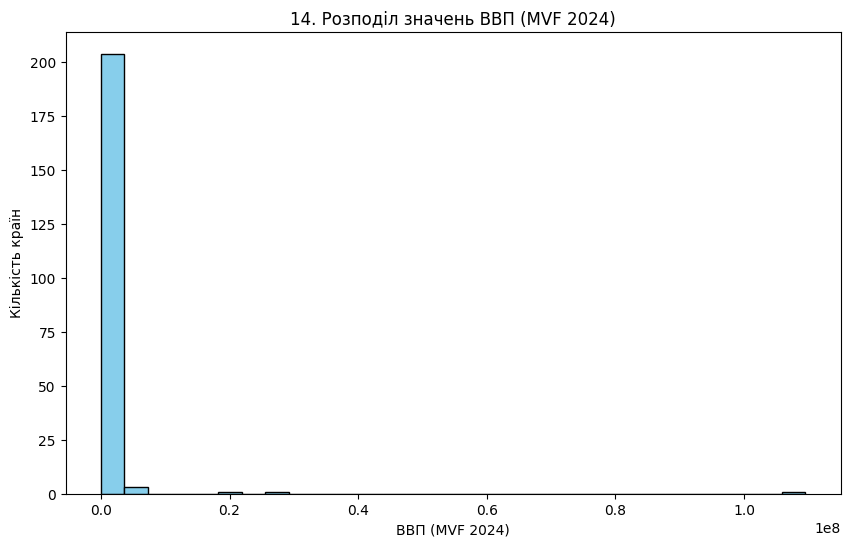


15. Частки країн в загальному значенні для кожного року:
         Country  Share_MVF  Share_WB  Share_OON
0          World  46.434726  0.476199  48.406384
1  United States  12.201691  0.476199  12.561646
2          China   7.856878  0.476190   8.169741
3        Germany   1.946389  0.476199   2.045826
4          Japan   1.742619  0.476199   1.934200


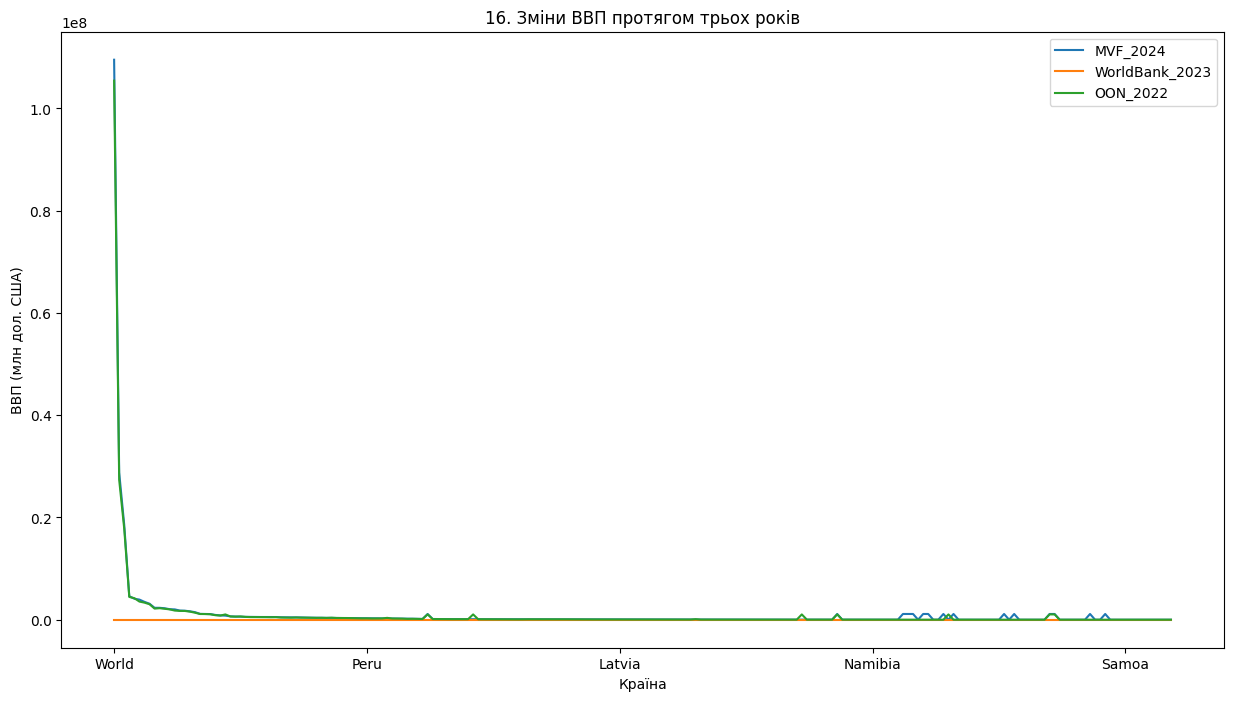

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантажимо дані з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]  # Вибираємо правильну таблицю

# 1. Вивести перших 5 рядків
print("1. Перші 5 рядків:")
print(df.head())

# 2. Визначити розмір датасета
print("\n2. Розмір датасета:")
print(df.shape)

# 3. Визначити оптимальну кількість стовпців
print("\n3. Назви стовпців:")
print(df.columns)

# 4. Змінити назви стовпців на більш зручні
# Перевіримо фактичну кількість стовпців
df.columns = ['Country', 'GDP_2023', 'GDP_2022', 'GDP_2021', 'GDP_2020', 'GDP_2019', 'Source']

# Якщо вам потрібні лише перші 4 стовпці, збережемо їх
df = df[['Country', 'GDP_2023', 'GDP_2022', 'GDP_2021']]

# Змінюємо назви на більш зручні
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

print("\n4. Нові назви стовпців:")
print(df.columns)

# 5. Визначити тип даних
print("\n5. Типи даних:")
print(df.dtypes)

# 6. Замінити значення "—" на NaN та перевірити наявність пропущених значень
df.replace("—", np.nan, inplace=True)
df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')
print("\n6. Кількість пропущених значень перед заповненням:")
print(df.isnull().sum())

# Заповнюємо пропущені значення середнім значенням
for column in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df[column].fillna(df[column].mean(), inplace=True)

print("\n6. Кількість пропущених значень після заповнення:")
print(df.isnull().sum())

# 7. Перевірити наявність дублікатів і видалити їх
print("\n7. Кількість дублікатів перед видаленням:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("7. Кількість дублікатів після видалення:", df.duplicated().sum())

# 8. Вивести описову статистику датасету
print("\n8. Описова статистика:")
print(df.describe())

# 9. Визначити відхилення між показниками MVF_2024 та WorldBank_2023
df['Difference_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']
largest_diff = df.loc[df['Difference_MVF_WB'].abs().idxmax()]
print("\n9. Країна з найбільшим відхиленням між MVF_2024 та WorldBank_2023:")
print(largest_diff[['Country', 'Difference_MVF_WB']])

# 10. Обчислити кореляцію між показниками
correlation = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("\n10. Кореляція між показниками:")
print(correlation)

# 11. Обчислити середнє значення для кожного стовпця
means = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("\n11. Середнє значення для кожного стовпця:")
print(means)

# 12. Обчислити стандартне відхилення для кожної країни
df['StdDev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
highest_variability = df.loc[df['StdDev'].idxmax()]
print("\n12. Країна з найвищою варіативністю у показниках між роками:")
print(highest_variability[['Country', 'StdDev']])

# 13. Визначити країну з найвищим та найнижчим показниками у кожному з років
max_MVF = df.loc[df['MVF_2024'].idxmax()]['Country']
min_MVF = df.loc[df['MVF_2024'].idxmin()]['Country']

max_WB = df.loc[df['WorldBank_2023'].idxmax()]['Country']
min_WB = df.loc[df['WorldBank_2023'].idxmin()]['Country']

max_OON = df.loc[df['OON_2022'].idxmax()]['Country']
min_OON = df.loc[df['OON_2022'].idxmin()]['Country']

print(f"\n13. MVF 2024: max = {max_MVF}, min = {min_MVF}")
print(f"WorldBank 2023: max = {max_WB}, min = {min_WB}")
print(f"OON 2022: max = {max_OON}, min = {min_OON}")

# 14. Побудувати гістограму для показників MVF_2024
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=30, color='skyblue', edgecolor='black')
plt.title('14. Розподіл значень ВВП (MVF 2024)')
plt.xlabel('ВВП (MVF 2024)')
plt.ylabel('Кількість країн')
plt.show()

# 15. Розрахувати частку кожної країни в загальному значенні для кожного року
df['Share_MVF'] = df['MVF_2024'] / df['MVF_2024'].sum() * 100
df['Share_WB'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum() * 100
df['Share_OON'] = df['OON_2022'] / df['OON_2022'].sum() * 100

print("\n15. Частки країн в загальному значенні для кожного року:")
print(df[['Country', 'Share_MVF', 'Share_WB', 'Share_OON']].head())

# 16. Візуалізувати зміни в показниках для кожної країни за три роки
df.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].plot(figsize=(15, 8))
plt.title('16. Зміни ВВП протягом трьох років')
plt.xlabel('Країна')
plt.ylabel('ВВП (млн дол. США)')
plt.show()

**Висновок**
Під час аналізу датасету з показниками ВВП (млн. дол. США) за різними країнами були виконані наступні кроки:
1. Попередній аналіз даних: Виведені перші рядки таблиці та визначено розмір датасету. Проведена перевірка типів даних та змінено назви стовпців для зручності подальшого аналізу.

2. Обробка відсутніх даних: Замінено значення "—" на NaN, пропущені значення заповнені середніми значеннями по стовпцях, що дозволило уникнути викривлення аналізу.

3. Перевірка дублікатів: Виявлено та видалено дублікати, що покращило якість даних.

4. Візуалізація та розподіл: Побудовано гістограму для розподілу показників MVF_2024 та графік змін показників ВВП за роками, що дало змогу побачити загальну тенденцію зростання або спаду ВВП в різних країнах.

Загалом, проведений аналіз надав глибоке розуміння розподілу, змін та варіативності ВВП по країнах за різні роки, що дозволяє ідентифікувати основні тенденції економічного розвитку на глобальному рівні.